<a href="https://colab.research.google.com/github/Maxwell-Gitonga/AI-Coursework2025/blob/main/Mall_Customer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q scikit-learn pandas matplotlib seaborn

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
uploaded = files.upload()   # click "Choose Files" and select the CSV you downloaded (e.g., Mall_Customers.csv)
for fn in uploaded.keys():
    print('Uploaded file:', fn)

Saving archive (1).zip to archive (1).zip
Uploaded file: archive (1).zip


In [5]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1) (1).zip


In [7]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [8]:
import pandas as pd
df = pd.read_csv("Mall_Customers (1).csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Mall_Customers (1).csv'

In [9]:
!ls

'archive (1) (1).zip'  'archive (1).zip'   Mall_Customers.csv   sample_data


In [10]:
df = pd.read_csv("Mall_Customers.csv")

In [12]:
df = pd.read_csv("Mall_Customers.csv")

In [13]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


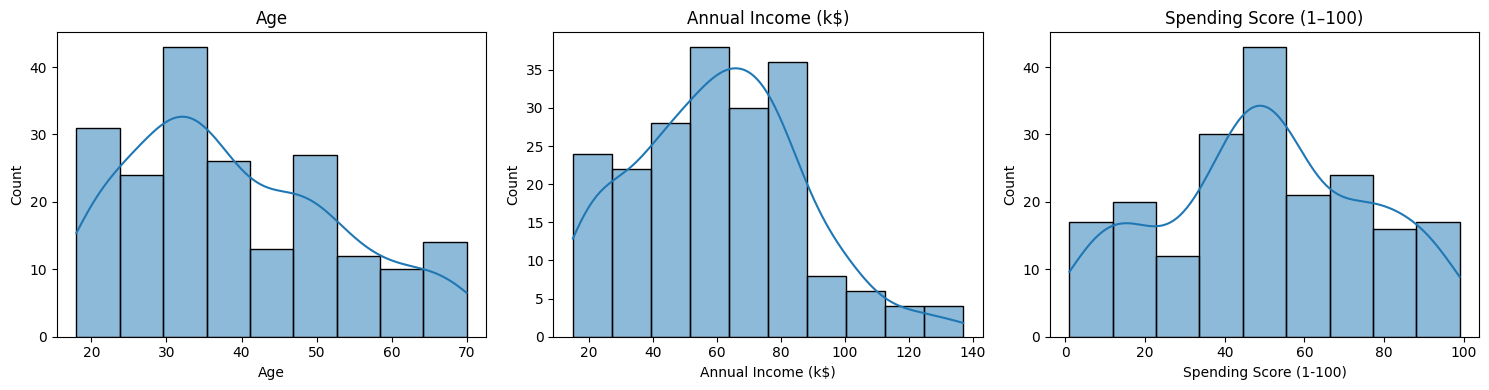

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df['Age'], kde=True, ax=axes[0]).set_title('Age')
sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[1]).set_title('Annual Income (k$)')
sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[2]).set_title('Spending Score (1–100)')
plt.tight_layout()
plt.show()

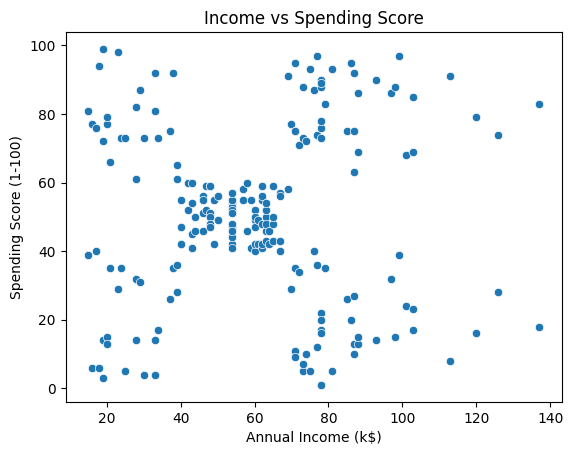

In [16]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Income vs Spending Score')
plt.show()

In [18]:
# One feature
X1 = df[['Annual Income (k$)']].values

In [19]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [20]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

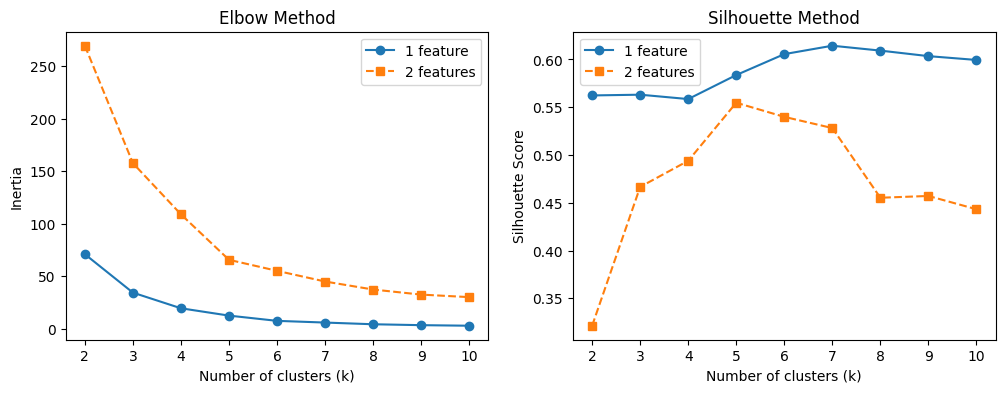

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

def evaluate_kmeans(X, k_range=range(2, 11)):
    inertias = []
    silhouettes = []
    for k in k_range:
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = km.fit_predict(X)
        inertias.append(km.inertia_)
        silhouettes.append(silhouette_score(X, labels))
    return inertias, silhouettes

# Evaluate both
inertias1, silhouettes1 = evaluate_kmeans(X1_scaled)
inertias2, silhouettes2 = evaluate_kmeans(X2_scaled)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(range(2, 11), inertias1, 'o-', label='1 feature')
axes[0].plot(range(2, 11), inertias2, 's--', label='2 features')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].legend()

axes[1].plot(range(2, 11), silhouettes1, 'o-', label='1 feature')
axes[1].plot(range(2, 11), silhouettes2, 's--', label='2 features')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Method')
axes[1].legend()
plt.show()

In [22]:
k1 = 3   # example best for 1 feature
k2 = 5   # example best for 2 features

kmeans1 = KMeans(n_clusters=k1, random_state=42, n_init=10).fit(X1_scaled)
kmeans2 = KMeans(n_clusters=k2, random_state=42, n_init=10).fit(X2_scaled)

labels1 = kmeans1.labels_
labels2 = kmeans2.labels_

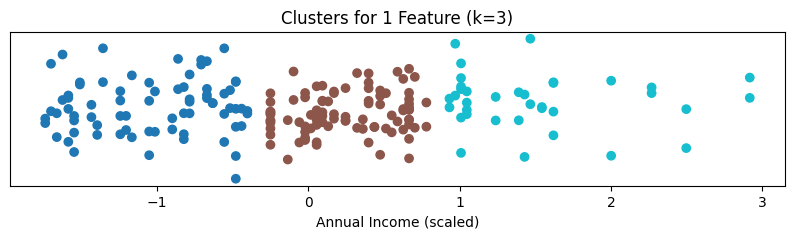

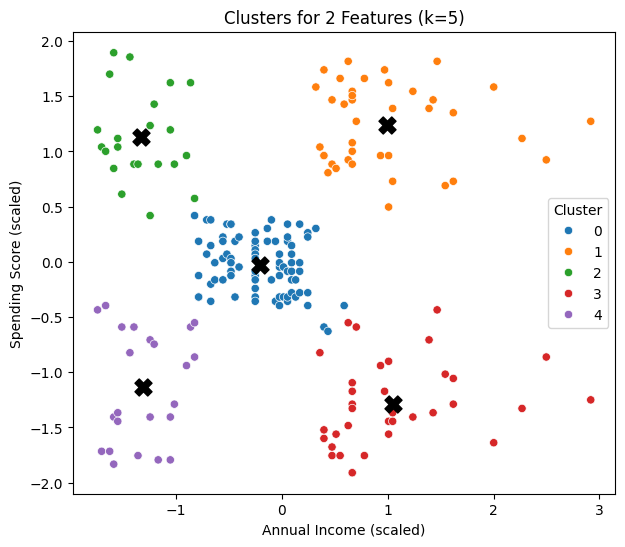

In [23]:
# 1 feature (plot with small jitter)
plt.figure(figsize=(10,2))
plt.scatter(X1_scaled[:,0], np.random.normal(0,0.02,len(X1_scaled)), c=labels1, cmap='tab10')
plt.yticks([]); plt.title(f'Clusters for 1 Feature (k={k1})'); plt.xlabel('Annual Income (scaled)')
plt.show()

# 2 features
plt.figure(figsize=(7,6))
sns.scatterplot(x=X2_scaled[:,0], y=X2_scaled[:,1], hue=labels2, palette='tab10')
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='black', s=150, marker='X')
plt.title(f'Clusters for 2 Features (k={k2})')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend(title='Cluster')
plt.show()

In [24]:
df['cluster_1feature'] = labels1
df['cluster_2features'] = labels2

In [25]:
print(df.groupby('cluster_1feature')['Annual Income (k$)'].mean())
print(df.groupby('cluster_2features')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())

cluster_1feature
0    33.486486
1    67.088889
2    99.888889
Name: Annual Income (k$), dtype: float64
                   Annual Income (k$)  Spending Score (1-100)
cluster_2features                                            
0                           55.296296               49.518519
1                           86.538462               82.128205
2                           25.727273               79.363636
3                           88.200000               17.114286
4                           26.304348               20.913043
